In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel (r'C:\Users\Admin\Downloads\Well_58-32_processed_pason_log_API.xlsx')
print (df)

      Depth(ft)  ROP(1 ft)  weight on bit (k-lbs)  Temp Out( degF)  \
0       1401.28      27.98                  13.40           121.01   
1       1402.30      70.42                  15.26           121.01   
2       1403.32      73.22                  16.26           121.05   
3       1404.33      77.92                  15.72           121.01   
4       1405.35      67.84                  13.98           121.09   
...         ...        ...                    ...              ...   
6039    7532.21      10.81                  30.55           138.89   
6040    7533.22      13.51                  30.23           138.89   
6041    7534.23      12.62                  29.95           139.08   
6042    7535.24      14.72                  31.06           139.31   
6043    7536.25      12.97                  30.60           139.39   

      Temp In(degF)  Pit Total (bbls)  Pump Press (psi)  Hookload (k-lbs)  \
0            118.21            236.87            640.62             57.38   
1    

In [3]:
columns = ['Depth(ft)','weight on bit (k-lbs)','Pump Press (psi)','Surface Torque (KPa)','Rotary Speed (rpm)','Flow In (gal/min)','ROP(1 ft)']
df = df.loc[:, columns]
df.head(6044)

,Depth(ft),weight on bit (k-lbs),Pump Press (psi),Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),ROP(1 ft)
0,1401.28,13.40,640.62,958.27,113.11,930.43,27.98
1,1402.30,15.26,634.52,1027.15,103.65,866.61,70.42
2,1403.32,16.26,665.78,1022.67,103.44,961.17,73.22
3,1404.33,15.72,676.08,1068.66,95.23,959.99,77.92
4,1405.35,13.98,676.08,932.20,105.69,961.62,67.84
...,...,...,...,...,...,...,...
6039,7532.21,30.55,1549.23,1049.76,34.91,609.49,10.81
6040,7533.22,30.23,1565.90,1040.52,34.78,615.09,13.51
6041,7534.23,29.95,1506.81,1059.97,34.72,635.76,12.62
6042,7535.24,31.06,1408.32,999.78,36.49,627.15,14.72


In [4]:
X= pd.DataFrame(df.iloc[:,:-1])
X

,Depth(ft),weight on bit (k-lbs),Pump Press (psi),Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min)
0,1401.28,13.40,640.62,958.27,113.11,930.43
1,1402.30,15.26,634.52,1027.15,103.65,866.61
2,1403.32,16.26,665.78,1022.67,103.44,961.17
3,1404.33,15.72,676.08,1068.66,95.23,959.99
4,1405.35,13.98,676.08,932.20,105.69,961.62
...,...,...,...,...,...,...
6039,7532.21,30.55,1549.23,1049.76,34.91,609.49
6040,7533.22,30.23,1565.90,1040.52,34.78,615.09
6041,7534.23,29.95,1506.81,1059.97,34.72,635.76
6042,7535.24,31.06,1408.32,999.78,36.49,627.15


In [5]:
y= pd.DataFrame(df.iloc[:,-1])
y

,ROP(1 ft)
0,27.98
1,70.42
2,73.22
3,77.92
4,67.84
...,...
6039,10.81
6040,13.51
6041,12.62
6042,14.72


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [8]:
regressor= RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred)

<ipython-input-8-0b472b7daa56>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


In [9]:
r2_test

0.8433974410259371

In [10]:
y_test

,ROP(1 ft)
4481,7.09
3447,11.49
2552,25.90
542,20.46
645,25.95
...,...
4024,10.44
1183,57.21
3609,8.34
4907,17.55


In [11]:
y_pred

array([ 8.5665,  9.8685, 17.7765, ...,  7.988 , 13.716 , 15.87  ])

In [12]:
X_train

,Depth(ft),weight on bit (k-lbs),Pump Press (psi),Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min)
3680,5154.35,28.65,1567.81,1199.04,53.06,614.43
4918,6399.97,35.86,1250.73,1021.84,43.98,602.17
1797,3253.34,26.11,1561.42,1038.94,40.46,695.30
5147,6631.55,35.59,1699.24,1040.25,38.81,695.64
2241,3703.37,20.86,1877.58,1155.67,57.85,723.49
...,...,...,...,...,...,...
448,1857.29,20.49,638.71,683.02,105.91,867.77
3068,4545.68,28.30,1757.22,1306.33,63.16,729.31
4912,6393.88,34.97,1259.07,871.73,45.03,597.86
2199,3661.18,23.27,1840.61,1091.00,53.49,733.85


In [13]:
regressor= RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred)

<ipython-input-13-0b472b7daa56>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


In [14]:
regressor= RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X_train,y_train)
a_trainpredict=regressor.predict(X_train)
r2_train = metrics.r2_score(y_train,a_trainpredict)

<ipython-input-14-fb65d6fc7d43>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


In [15]:
r2_train

0.9715967177633291

In [16]:
a_trainpredict

array([ 9.8045, 13.568 , 21.97  , ..., 14.351 , 12.81  , 11.4625])

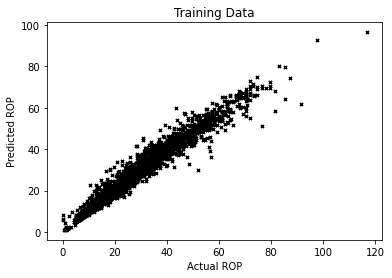

In [52]:
size=10
plt.scatter(y_train,a_trainpredict,c='black',s=size,marker="x")
plt.title("Training Data")
plt.xlabel("Actual ROP")
plt.ylabel("Predicted ROP")
plt.show()

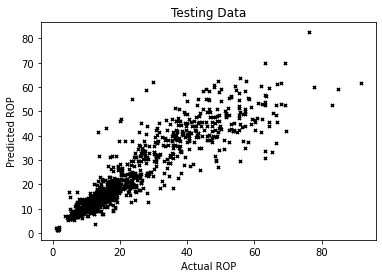

In [51]:
size=10
plt.scatter(y_test, y_pred,c='black',s=size,marker="x")
plt.title("Testing Data")
plt.xlabel("Actual ROP")
plt.ylabel("Predicted ROP")
plt.show()

In [33]:
from sklearn.metrics import r2_score

In [19]:
print('R-squared:',metrics.r2_score(y_test,y_pred))

R-squared: 0.8433974410259371


In [20]:
print('R-squared:',metrics.r2_score(y_train,a_trainpredict))

R-squared: 0.9715967177633291
